In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from preprocess import Preprocess

#### Tutorial of how to use the preprocess function in pyAutomagic

Preprocess is the wraper pipeline for preprocessing EEG data. It combines
prep_pipeline to locate bad channels, performFilter to help clean the
data, performEOGRegression to remove EOG artifact, and lastly RPCA will
remove any noisy components. After processing colorplots are made of the
data at each step in the pipeline. 

In [2]:
#First load a sample data set to work with using MNE. pyAutomagic uses
#mne raw object to store the data.

raw = mne.io.read_raw_edf('/Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data1/Subj1/S016R01.edf')


Extracting EDF parameters from /Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data1/Subj1/S016R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
#Params is filled with the parameters for each processing function 
#Line noise usually 50 or 60
#'high', 'low', 'notch'
#filter frequency 
#Filter size, default='auto'
#True-use EOG regression False-exclude
#lamda - rpca parameter 
#Tolerence - rpca parameter 
#Maximum Iterations - rpca parameter 
params = {'line_freqs' : 50,\
          'filter_type' : 'high', \
          'filt_freq' : None, \
          'filter_length' : 'auto', \
          'eog_regression' : False, \
          'lam' : -1, \
          'tol' : 1e-7, \
          'max_iter': 1000, \
          'ref_chs': None,\
          'eval_chs': None,\
          'reref_chs': None, \
          }

In [4]:
#Create Prprocess object using mne Raw and params 
preprocess = Preprocess(raw, params)


Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [5]:
#perform_prep
#returns list of the names of all bad channel
bad_channels = preprocess.perform_prep()

In [6]:
#perform_filter
#returns matrix of filtered eeg data
filtered_data =preprocess.perform_filter()

Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 1057 samples (6.606 sec)



In [7]:
#perform_EOG_regression
filtered_data_EOG_regression = preprocess.perform_eog_regression()

In [8]:
#perform_rpca
filtered_data_rpca = preprocess.perform_RPCA()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


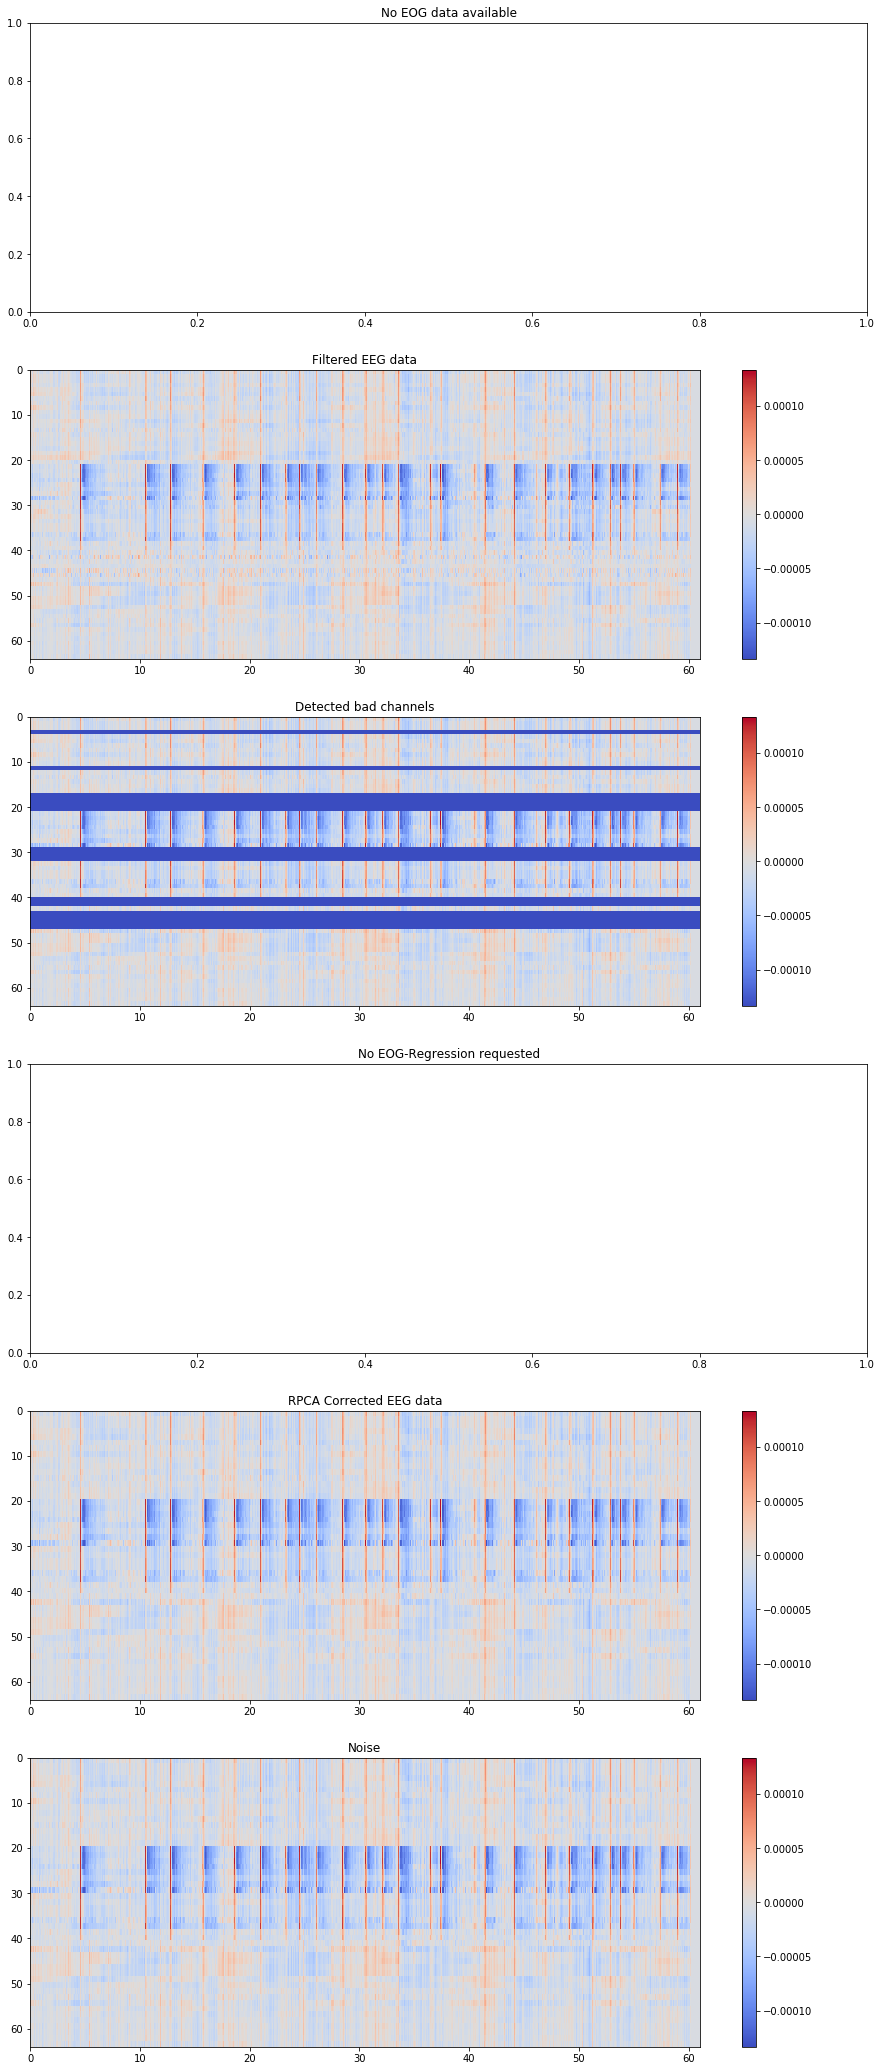

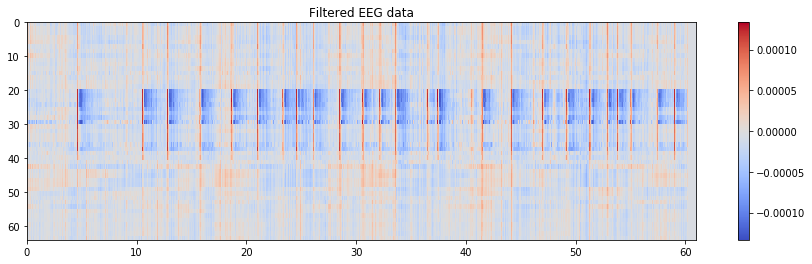

In [9]:
#plot
fig1, fig2 = preprocess.plot()

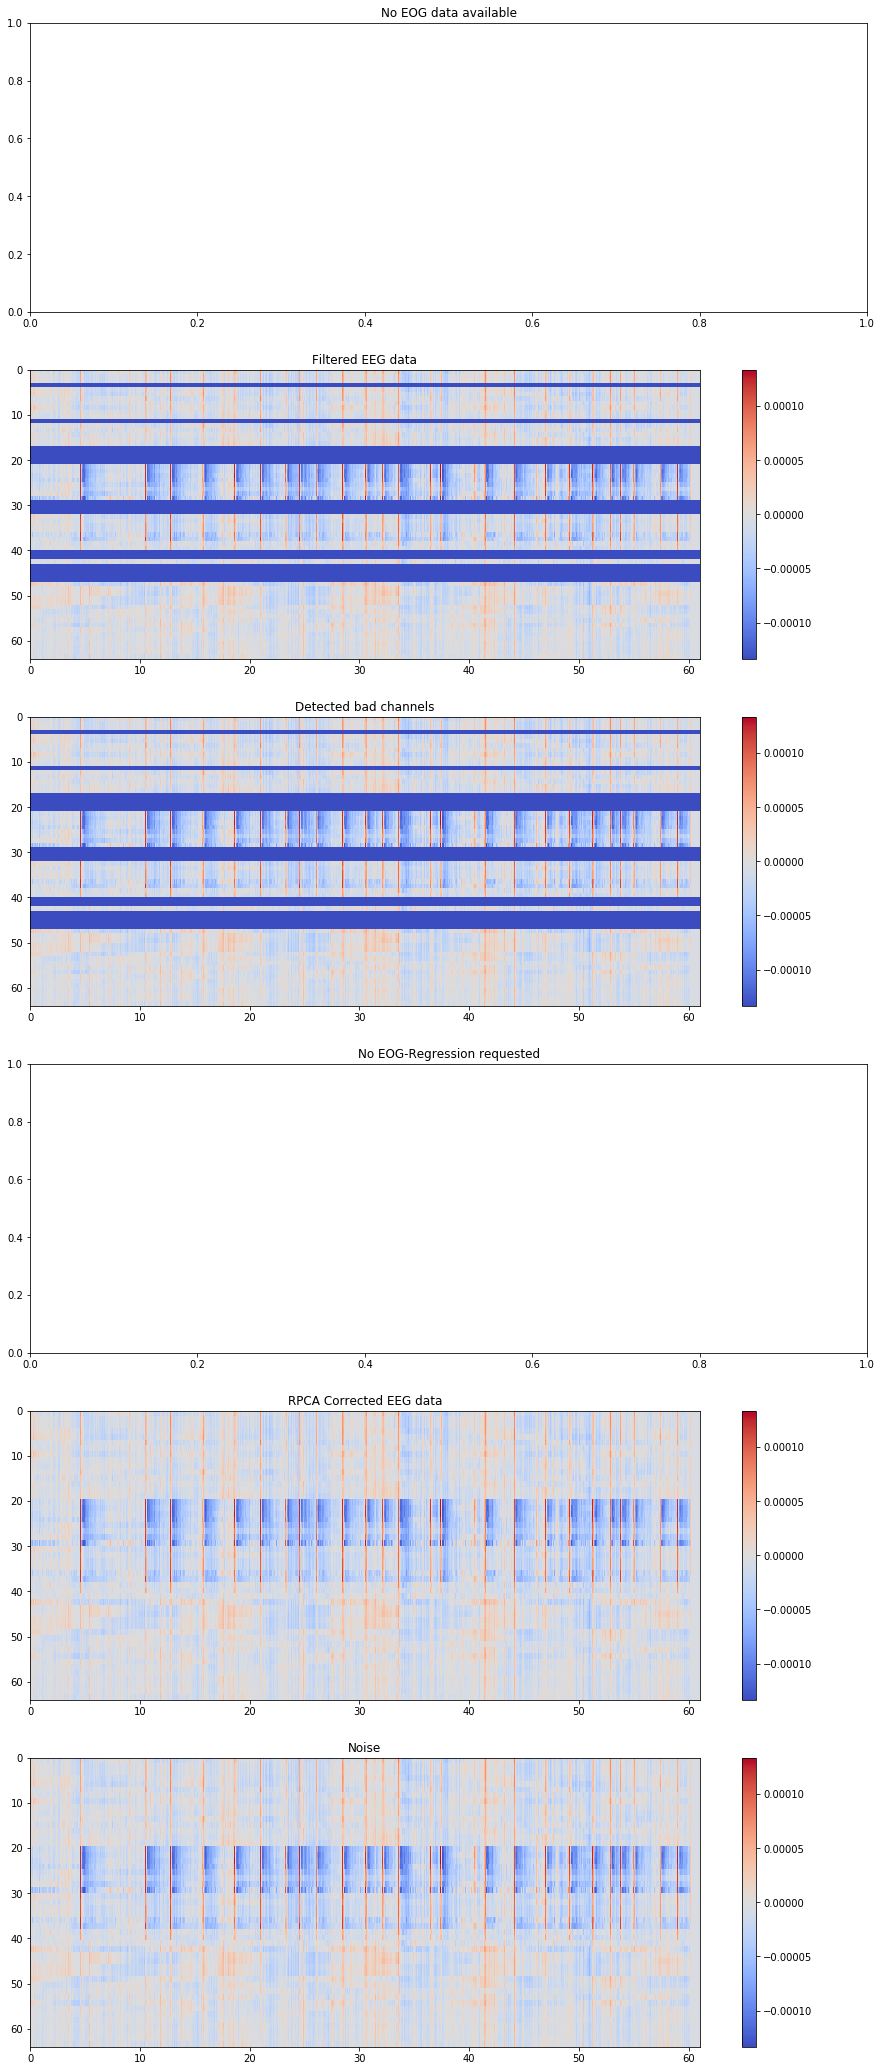

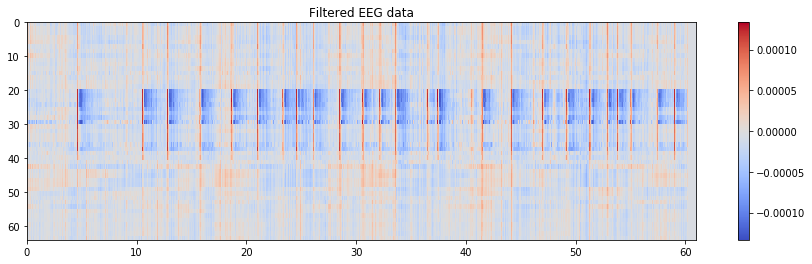

In [10]:
#fit() is the preprocess pipeline of pyautomagic

#eeg_clean = final clean mne raw object
#fig1 = 6 Subplots: EOG, Initial Filtered EEG,
#       marked bad channels, EEG with EOG removed,
#       RPCA Corrected, and RPCA removed noise 
#fig2 = single plot of the Initial Filtered EEG

eeg_clean, fig1, fig2 = preprocess.fit()